In [1]:
import control as ct
import numpy as np
import display_utils as dp
import matplotlib.pyplot as plt

In [2]:
def build_sys(K: float):
    A = np.array([[0, 1, 0], [0, 0, 1], [-2, -K, -2]])
    B = np.array([[0], [0], [1]])
    C = np.array([[1, 0, 0]])
    D = np.array([[0]])
    sys = ct.ss(A, B, C, D)
    return sys

In [3]:
def plot_stability_range(kmin, kmax):
    # Calculate eigenvalues for each K value
    K_values = np.arange(kmin, kmax, 0.1)
    eigenvalues = []
    for K in K_values:
        sys = build_sys(K)
        eigs = np.linalg.eigvals(sys.A)
        eigenvalues.append(eigs)

    eigenvalues = np.array(eigenvalues)

    # Determine stability range
    stable_K = []
    for idx, K in enumerate(K_values):
        if np.all(eigenvalues[idx].real < 0):
            stable_K.append(K)

    # Plot eigenvalues
    plt.figure(figsize=(12, 5))

    line_styles = [['b', ':'], ['g', '--'], ['m', '-.']]

    for i in range(eigenvalues.shape[1]):
        plt.plot(K_values, eigenvalues[:, i].real, label=f'λ{i+1} (real)')
    plt.axhline(y=0, color='r', linestyle='--', label='Stability boundary')

    # Add vertical lines for stability range
    if stable_K:
        min_stable = min(stable_K)
        max_stable = max(stable_K)
        plt.axvline(x=min_stable, color='orange', linestyle=':', linewidth=2, label=f'Min stable K = {min_stable:.1f}')
        plt.axvline(x=max_stable, color='purple', linestyle=':', linewidth=2, label=f'Max stable K = {max_stable:.1f}')

    plt.xlabel('K')
    plt.ylabel('Real part of eigenvalues')
    plt.title('Real Part of Eigenvalues vs K')
    plt.legend()
    plt.grid(True)

    if stable_K:
        print(f"Range of K for stability (all eigenvalues in left half-plane): {min(stable_K):1f} ≤ K ≤ {max(stable_K)}")
    else:
        print("No stable range found in the given K values")

Range of K for stability (all eigenvalues in left half-plane): 1.000000 ≤ K ≤ 9.9
Range of K for stability (all eigenvalues in left half-plane): 1.100000 ≤ K ≤ 4.899999999999965
Range of K for stability (all eigenvalues in left half-plane): 1.000000 ≤ K ≤ 99.9


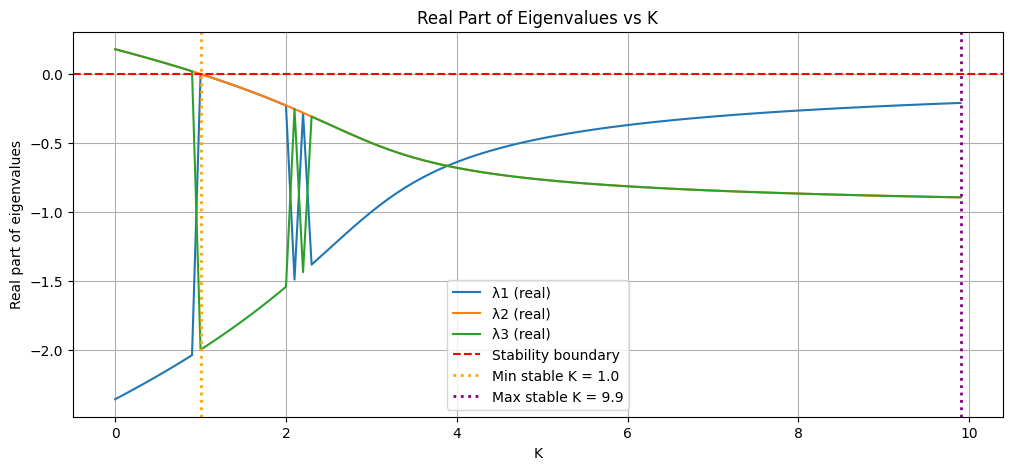

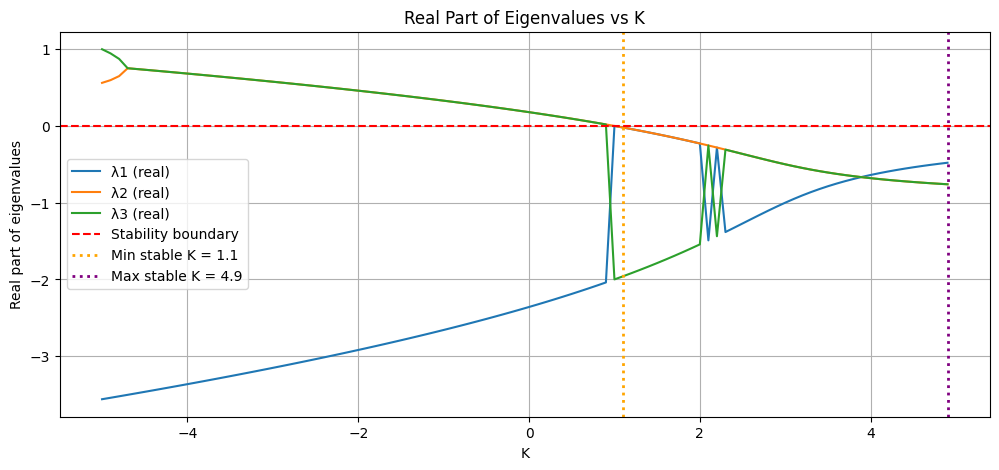

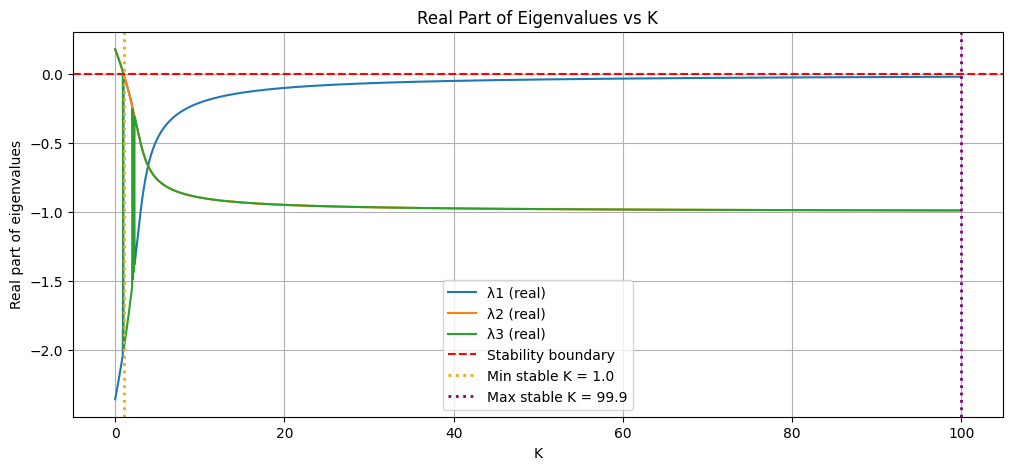

In [4]:
plot_stability_range(0, 10)
plot_stability_range(-5, 5)
plot_stability_range(0, 100)